In [36]:
import networkx as nx
import numpy as np


## ASAP example code

In [37]:
G = nx.DiGraph()


In [38]:
G.add_node(1, t_level=0, priority=0, WCET=1)
G.add_node(2, t_level=0, priority=0)
G.add_node(3, t_level=0, priority=0)
G.add_node(4, t_level=0, priority=0)
G.add_node(5, t_level=0, priority=0)
G.add_node(6, t_level=0, priority=0)
G.add_node(7, t_level=0, priority=0)


In [39]:
G.nodes


NodeView((1, 2, 3, 4, 5, 6, 7))

In [40]:
G.add_edge(1, 2, cost=1)
G.add_edge(2, 4, cost=2)
G.add_edge(3, 5, cost=1)
G.add_edge(6, 7, cost=3)
G.add_edge(1, 6, cost=1)
G.add_edge(2, 3, cost=2)
G.add_edge(4, 5, cost=1)
G.add_edge(5, 7, cost=3)


In [41]:
nx.dag_longest_path(G, weight='cost')


[1, 2, 3, 5, 7]

In [42]:
G.nodes[1]['WCET']


1

In [43]:
nx.dag_longest_path_length(G, weight='cost')+G.nodes[1]['WCET']


8

In [44]:
sorted(list(nx.ancestors(G, 3)))


[1, 2]

In [45]:
sorted(list(G.predecessors(1)))


[]

In [46]:
sorted(list(G.predecessors(2)))


[1]

In [47]:
G.nodes[2]['t_level']


0

In [48]:
G.get_edge_data(1, 2)


{'cost': 1}

In [49]:
G.nodes[2]['t_level'] = np.max(
    (G.nodes[1]['t_level']+G.get_edge_data(1, 2)['cost']), G.nodes[2]['t_level'])
G.nodes[2]['t_level']


1

In [50]:
for node in G.nodes:
    node_prede = sorted(list(G.predecessors(node)))
    for prede in node_prede:
        temp_t_level = G.nodes[prede]['t_level'] + \
            G.get_edge_data(prede, node)['cost']
        G.nodes[node]['t_level'] = max(temp_t_level, G.nodes[node]['t_level'])
    print('Node', node, ': t_level = ', G.nodes[node]['t_level'])


Node 1 : t_level =  0
Node 2 : t_level =  1
Node 3 : t_level =  3
Node 4 : t_level =  3
Node 5 : t_level =  4
Node 6 : t_level =  1
Node 7 : t_level =  7


In [51]:
node_order = sorted(G.nodes(), key=lambda n: G.nodes[n]['t_level'])
node_order


[1, 2, 6, 3, 4, 5, 7]

In [52]:
G.order()


7

In [53]:
for i in range(G.order()):
    if i == 0:
        G.nodes[node_order[i]]['priority'] = 1
    else:
        if G.nodes[node_order[i]]['t_level'] == G.nodes[node_order[i-1]]['t_level']:
            G.nodes[node_order[i]
                    ]['priority'] = G.nodes[node_order[i-1]]['priority']
        else:
            G.nodes[node_order[i]
                    ]['priority'] = G.nodes[node_order[i-1]]['priority']+1
for node in G.nodes:
    print('Node', node, ': priority = ', G.nodes[node]['priority'])


Node 1 : priority =  1
Node 2 : priority =  2
Node 3 : priority =  3
Node 4 : priority =  3
Node 5 : priority =  4
Node 6 : priority =  2
Node 7 : priority =  5


##  ALAP example code

In [65]:
def single_source_longest_dag_path_length(graph, s):
    dic = dict.fromkeys(graph.nodes, -float('inf'))
    dic[s] = 0
    topo_order = nx.topological_sort(graph)
    for n in topo_order:
        for s in graph.successors(n):
            dic[s] = max(dic[s], dic[n] + graph.edges[n, s]['cost'])
        dic[n] += graph.nodes[1]['WCET']
    return dic


In [55]:
def longest_dag_path_length_src_to_others(graph):
    """_summary_
    The longest path length that from the node s to all other node
    Args:
        graph (_type_): _description_

    Returns:
        dic: element pair is <node, length>
    """
    s = 1
    dic = dict.fromkeys(graph.nodes, -float('inf'))
    dic[s] = 0
    topo_order = nx.topological_sort(graph)
    for n in topo_order:
        for s in graph.successors(n):
            dic[s] = max(dic[s], dic[n] + graph.edges[n, s]['cost'])
        dic[n] += graph.nodes[n]['WCET']
    return dic


In [56]:
def longest_dag_path_length_node_to_sink(graph, s):
    """_summary_
    The longest path length that from the node s to all other node
    Args:
        graph (_type_): _description_
        s (_type_): _description_

    Returns:
        dic: element pair is <node, length>
    """
    dic = dict.fromkeys(graph.nodes, -float('inf'))
    dic[s] = 0
    topo_order = nx.topological_sort(graph)
    for n in topo_order:
        for s in graph.successors(n):
            dic[s] = max(dic[s], dic[n] + graph.edges[n, s]['cost'])
        dic[n] += graph.nodes[1]['WCET']
    return dic[len(graph.nodes)]


In [57]:
G.add_node(1, b_level=0, priority=0, WCET=1)
G.add_node(2, b_level=0, priority=0)
G.add_node(3, b_level=0, priority=0)
G.add_node(4, b_level=0, priority=0)
G.add_node(5, b_level=0, priority=0)
G.add_node(6, b_level=0, priority=0)
G.add_node(7, b_level=0, priority=0)


In [58]:
path_dict = single_source_longest_dag_path_length(G, 6)
path_dict


<class 'int'>


{1: -inf, 2: -inf, 3: -inf, 4: -inf, 5: -inf, 6: 1, 7: 4}

In [60]:
to_sink = longest_dag_path_length_node_to_sink(G, 6)
to_sink


4

In [61]:
max(path_dict, key=path_dict.get)


7

In [63]:
G_longest_path = nx.dag_longest_path_length(
    G, weight='cost')+G.nodes[1]['WCET']
G_longest_path


8

In [66]:
for node in G.nodes:
    node_longest_path_dict = single_source_longest_dag_path_length(G, node)
    node_longest_path = max(node_longest_path_dict.values())
    G.nodes[node]['b_level'] = node_longest_path
    print('Node', node, ': b_level = ', G.nodes[node]['b_level'])


Node 1 : b_level =  8
Node 2 : b_level =  7
Node 3 : b_level =  5
Node 4 : b_level =  5
Node 5 : b_level =  4
Node 6 : b_level =  4
Node 7 : b_level =  1


$ 𝐸𝑆𝑇 = 𝑇_{criticalpath}- 𝑏_i $

In [67]:
node_order = sorted(G.nodes(), key=lambda n: G.nodes[n]['b_level'])
node_order.reverse()
node_order


[1, 2, 4, 3, 6, 5, 7]

In [68]:
for i in range(G.order()):
    if i == 0:
        G.nodes[node_order[i]]['priority'] = 1
    else:
        if G.nodes[node_order[i]]['b_level'] == G.nodes[node_order[i-1]]['b_level']:
            G.nodes[node_order[i]
                    ]['priority'] = G.nodes[node_order[i-1]]['priority']
        else:
            G.nodes[node_order[i]
                    ]['priority'] = G.nodes[node_order[i-1]]['priority']+1
for node in G.nodes:
    print('Node', node, ': priority = ', G.nodes[node]['priority'])


Node 1 : priority =  1
Node 2 : priority =  2
Node 3 : priority =  3
Node 4 : priority =  3
Node 5 : priority =  4
Node 6 : priority =  4
Node 7 : priority =  5


In [69]:
G.nodes.data()


NodeDataView({1: {'t_level': 0, 'priority': 1, 'WCET': 1, 'b_level': 8}, 2: {'t_level': 1, 'priority': 2, 'b_level': 7}, 3: {'t_level': 3, 'priority': 3, 'b_level': 5}, 4: {'t_level': 3, 'priority': 3, 'b_level': 5}, 5: {'t_level': 4, 'priority': 4, 'b_level': 4}, 6: {'t_level': 1, 'priority': 4, 'b_level': 4}, 7: {'t_level': 7, 'priority': 5, 'b_level': 1}})

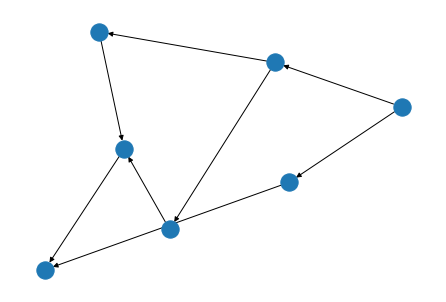

In [70]:
nx.draw(G)


### Drawing 
https://networkx.org/documentation/latest/reference/drawing.html

In [71]:
sorted(G.nodes(), key=lambda n: G.nodes[n]['b_level'])


[7, 5, 6, 3, 4, 2, 1]

In [72]:
node_order = sorted(G.nodes(), key=lambda n: G.nodes[n]['b_level'])
node_order.reverse()
node_order


[1, 2, 4, 3, 6, 5, 7]

## Test on real DAG file

### Tasks_1

In [73]:
dag_file_path = './DAG example/Tasks_1_Run_0.csv'

# R,1
# M,8
# #
# T,1,500,500,0
# V,1,1,0,0,65,86
# V,1,2,0,0,32,42,1
# V,1,3,0,0,81,107,2
# V,1,4,0,0,5,6,3
# V,1,5,0,0,26,34,1
# V,1,6,0,0,52,69,5
# V,1,7,0,0,59,78,6
# V,1,8,0,0,37,49,4,7
# V,1,9,0,0,26,34,8


In [226]:
ITPA = nx.DiGraph()
ITPA.add_node(1, WCET=1, l_level = 0)
ITPA.add_node(2, WCET=3, l_level = 0)
ITPA.add_node(3, WCET=1, l_level = 0)
ITPA.add_node(4, WCET=2, l_level = 0)
ITPA.add_node(5, WCET=1, l_level = 0)
ITPA.add_node(6, WCET=1, l_level = 0)
ITPA.add_node(7, WCET=1, l_level = 0)
ITPA.add_edge(1, 2, cost=1)
ITPA.add_edge(1, 3, cost=1)
ITPA.add_edge(1, 4, cost=1)
ITPA.add_edge(2, 5, cost=3)
ITPA.add_edge(3, 5, cost=1)
ITPA.add_edge(4, 7, cost=2)
ITPA.add_edge(5, 6, cost=1)
ITPA.add_edge(6, 7, cost=1)

print(ITPA.nodes[2]['WCET'])


3


In [75]:
src_dict = longest_dag_path_length_src_to_others(ITPA)
src_dict

{1: 1, 2: 4, 3: 2, 4: 3, 5: 5, 6: 6, 7: 7}

In [76]:
for node in ITPA.nodes:
    to_sink = longest_dag_path_length_node_to_sink(ITPA, node)
    print(node ,":",to_sink)

1 : 7
2 : 6
3 : 4
4 : 3
5 : 3
6 : 2
7 : 1


In [227]:
lf_dict = longest_dag_path_length_src_to_others(ITPA)
for node in ITPA.nodes:
    lb = longest_dag_path_length_node_to_sink(ITPA, node)
    ITPA.nodes[node]['l_level'] = lf_dict[node] + lb - ITPA.nodes[node]['WCET']
    print('Node', node, ': l_level = ', ITPA.nodes[node]['l_level'])


Node 1 : l_level =  7
Node 2 : l_level =  7
Node 3 : l_level =  5
Node 4 : l_level =  4
Node 5 : l_level =  7
Node 6 : l_level =  7
Node 7 : l_level =  7


In [85]:
ITPA.nodes.data()

NodeDataView({1: {'WCET': 1, 'l_level': 7}, 2: {'WCET': 3, 'l_level': 7}, 3: {'WCET': 1, 'l_level': 5}, 4: {'WCET': 2, 'l_level': 4}, 5: {'WCET': 1, 'l_level': 7}, 6: {'WCET': 1, 'l_level': 7}, 7: {'WCET': 1, 'l_level': 7}})

In [ ]:
for i in range(ITPA.order()):
    if i == 0:
        ITPA.nodes[node_order[i]]['priority'] = 1
    else:
        if ITPA.nodes[node_order[i]]['l_level'] == ITPA.nodes[node_order[i-1]]['l_level']:
            ITPA.nodes[node_order[i]
                    ]['priority'] = ITPA.nodes[node_order[i-1]]['priority']
        else:
            ITPA.nodes[node_order[i]
                    ]['priority'] = ITPA.nodes[node_order[i-1]]['priority']+1
for node in ITPA.nodes:
    print('Node', node, ': priority = ', ITPA.nodes[node]['priority'])

Node 1 : priority =  1
Node 2 : priority =  1
Node 3 : priority =  2
Node 4 : priority =  3
Node 5 : priority =  1
Node 6 : priority =  1
Node 7 : priority =  1


In [169]:
ITPA_p = ITPA.copy()

In [156]:
ITPA_p.nodes.data()

NodeDataView({1: {'WCET': 1, 'l_level': 0}, 2: {'WCET': 3, 'l_level': 0}, 3: {'WCET': 1, 'l_level': 0}, 4: {'WCET': 2, 'l_level': 0}, 5: {'WCET': 1, 'l_level': 0}, 6: {'WCET': 1, 'l_level': 0}, 7: {'WCET': 1, 'l_level': 0}})

In [123]:
temp = nx.DiGraph()
type(temp.nodes())
temp.size()
ITPA_p.nodes[1]

{'WCET': 1, 'l_level': 7}

In [117]:
for item in ITPA_p.pred.items():
    print(len(item[1])==0, item[0])

True 1
False 2
False 3
False 4
False 5
False 6
False 7


In [132]:
suc_0 = ITPA_p.successors(1)
A = list(suc_0)
len(A)

3

In [194]:
sub = ITPA_p.subgraph([1,2,3,4])
sub.nodes.data()
sub.edges


OutEdgeView([])

In [239]:
def ITPA_assign_priority(G, p):
    print('G is :', G.nodes.data())
    print(len(G.nodes))
    while len(G.nodes) != 0:
        temp_l_level = 0
        v = 0
        for node in G.pred.items():
            # have predecessor
            if len(node[1])!=0:
                continue
            if temp_l_level < G.nodes[node[0]]['l_level']: 
                v = node[0]
                temp_l_level = G.nodes[node[0]]['l_level']
        print('Set node ', v, ' to ', p)
        ITPA.nodes[v]['priority'] = p
        p += 1
        A = list(G.successors(v))
        print('A is : ', A)
        print('Want to remove ', v, ' from ', G.nodes)
        if len(G.nodes) == 1:
            G = nx.DiGraph()
        else:
            G.remove_node(v)
        print(G.nodes)
        while len(A) != 0:
            temp_l_level = 0
            for node in A:
                if temp_l_level < G.nodes[node]['l_level']:
                    v = node
                    temp_l_level = G.nodes[node]['l_level']
            pred_v = list(G.predecessors(v))
            if len(pred_v) != 0:
                ance_v = list(nx.ancestors(G, v))
                G_ = G.subgraph(ance_v)
                p = ITPA_assign_priority(G_, p)
                G.remove_nodes_from(ance_v)
            print('Set node ', v, ' to ', p)
            ITPA.nodes[v]['priority'] = p
            p += 1
            A = list(G.successors(v))
            print('A is : ', A)
            G.remove_node(v)
            print(G.nodes)
    return p

In [240]:
ITPA_p = ITPA.copy()
p = 1
ITPA_assign_priority(ITPA_p, p)

G is : [(1, {'WCET': 1, 'l_level': 7, 'priority': 1}), (2, {'WCET': 3, 'l_level': 7, 'priority': 2}), (3, {'WCET': 1, 'l_level': 5, 'priority': 3}), (4, {'WCET': 2, 'l_level': 4, 'priority': 5}), (5, {'WCET': 1, 'l_level': 7, 'priority': 3}), (6, {'WCET': 1, 'l_level': 7, 'priority': 4}), (7, {'WCET': 1, 'l_level': 7, 'priority': 5})]
7
Set node  1  to  1
A is :  [2, 3, 4]
Want to remove  1  from  [1, 2, 3, 4, 5, 6, 7]
[2, 3, 4, 5, 6, 7]
Set node  2  to  2
A is :  [5]
[3, 4, 5, 6, 7]
G is : [(3, {'WCET': 1, 'l_level': 5, 'priority': 3})]
1
Set node  3  to  3
A is :  []
Want to remove  3  from  [3]
[]
Set node  5  to  4
A is :  [6]
[4, 6, 7]
Set node  6  to  5
A is :  [7]
[4, 7]
G is : [(4, {'WCET': 2, 'l_level': 4, 'priority': 5})]
1
Set node  4  to  6
A is :  []
Want to remove  4  from  [4]
[]
Set node  7  to  7
A is :  []
[]


8

In [241]:
ITPA.nodes.data()

NodeDataView({1: {'WCET': 1, 'l_level': 7, 'priority': 1}, 2: {'WCET': 3, 'l_level': 7, 'priority': 2}, 3: {'WCET': 1, 'l_level': 5, 'priority': 3}, 4: {'WCET': 2, 'l_level': 4, 'priority': 6}, 5: {'WCET': 1, 'l_level': 7, 'priority': 4}, 6: {'WCET': 1, 'l_level': 7, 'priority': 5}, 7: {'WCET': 1, 'l_level': 7, 'priority': 7}})

In [242]:
for node in ITPA.nodes:
    print('Node', node, ': priority = ', ITPA.nodes[node]['priority'])

Node 1 : priority =  1
Node 2 : priority =  2
Node 3 : priority =  3
Node 4 : priority =  6
Node 5 : priority =  4
Node 6 : priority =  5
Node 7 : priority =  7
